# Exercise 1

**Segalini Beatrice, $1234430$, Physics of Data**

### 1.1 

To solve this first point, I created a simple program that prints the first $10$ integer numbers in float format, and finally print the string "It works!".

It can be found in the file _Ex1_1.f90_.

### 1.2

This program highlights that numbers in FORTRAN have finite precision. 
In particular, summing $2000$ and $1$ with `INTEGER*2` format leads to an overflow and hence to wrong results, while using `INTEGER*4` gives the correct output.

Similarly, it happens with real numbers $(\pi \cdot 10^{32} + \sqrt{2} \cdot 10^{21})$: using single precision (`REAL*4`) makes the sum equal to the bigger number (since the precision is not enough to observe changes), conversly double precision manages to add correctly the two numbers.

The code is found in _Ex1_2.f90_.

### 1.3

In the code found in _Ex1_3.f90_, one can find at least three different ways to implement matrix multiplication. The element $c(ii, jj)$ of the product matrix $C=A \times B$ is given by the following formula:

$$ c(ii, jj) = \sum_{kk=1}^{M} a(ii, kk) \cdot b(kk, jj)$$

where $a(ii, kk)$ and $b(kk, jj)$ are the elements of the matrices $A$ and $B$.

In particular, one can compute the product with:

- the intrinsic FORTRAN function 
- three nested cycles, with the indeces in the following order: $kk$, $jj$, $ii$
- three nested cycles, with the indeces in the following order: $ii$, $jj$, $kk$

The size of the matrices are manually inserted and the condition for computing the product ($\#$ of columns of matrix $A = \#$ of rows of matrix $B$) is checked: if the condition is not satisfied the computation stops.

To test the performances of the three algorithms, increasing sizes of square matrices are used $(20, 100, 300, 500, 700, 1000)$. Some plots for observing the scaling of time are produced. 

In [1]:
#import necessary packages
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import os.path

In [2]:
#test the algorithm with different matrix sizes
#I decided to test the program only with square matrices: N=M

#sizes of matrices
Ns = np.array([20, 100, 300, 500, 700, 1000])

#vector containing execution times for each algorithm
times = np.zeros((len(Ns), 3))

for i, dim in enumerate(Ns):
    output = subprocess.run(['./test.exe'], stdout=subprocess.PIPE, input="{}\n{}\n{}\n{}\n".format(dim, dim, dim, dim),
                            encoding="ascii")

    lines = output.stdout.lstrip().split('\n')
    #print(lines)
    times[i,0]=float(lines[-4]) #time ii-jj-kk
    times[i,1]=float(lines[-2]) #time kk-jj-ii
    times[i,2]=float(lines[-6]) #time instrinsic
    
    print('N = ', dim)
    print('Time taken: ', times[i,:])


N =  20
Time taken:  [0. 0. 0.]
N =  100
Time taken:  [0. 0. 0.]
N =  300
Time taken:  [0.125 0.125 0.   ]
N =  500
Time taken:  [0.59375  0.546875 0.015625]
N =  700
Time taken:  [1.6875   1.453125 0.015625]
N =  1000
Time taken:  [5.203125 5.140625 0.046875]


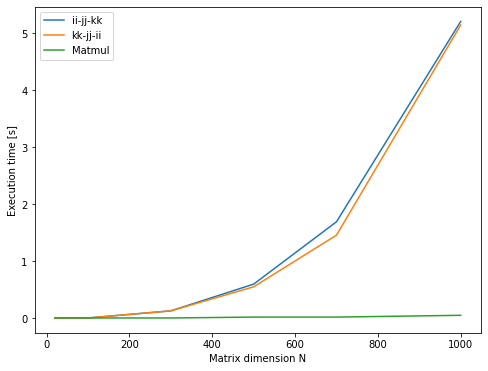

In [3]:
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

plt.xlabel('Matrix dimension N')
plt.ylabel('Execution time [s]')

ax.plot(Ns, times[:,0], label='ii-jj-kk')
ax.plot(Ns, times[:,1], label='kk-jj-ii')
ax.plot(Ns, times[:,2], label='Matmul')

plt.legend()
plt.show()

One can easily observe that Matmul function is the fastest, while the other two have similar performances, despite the $ii-jj-kk$ being slightly better. 

Finally, also other compiler different optimization flags are used and performances are compared.

In [4]:
#test the algorithm with different optimization flags
#FLAG O1

subprocess.run(["gfortran", "Ex1_3.f90", "-o", "o1.out", "-O1"])

#vector containing execution times for each algorithm
timesO1 = np.zeros((len(Ns), 3))

for i, dim in enumerate(Ns):
    output = subprocess.run(['./o1.out'], stdout=subprocess.PIPE, input="{}\n{}\n{}\n{}\n".format(dim, dim, dim, dim),
                            encoding="ascii")

    lines = output.stdout.lstrip().split('\n')
    #print(lines)
    timesO1[i,0]=float(lines[-4]) #time ii-jj-kk
    timesO1[i,1]=float(lines[-2]) #time kk-jj-ii
    timesO1[i,2]=float(lines[-6]) #time instrinsic
    
    print('N = ', dim)
    print('Time taken: ', timesO1[i,:])


N =  20
Time taken:  [0. 0. 0.]
N =  100
Time taken:  [0. 0. 0.]
N =  300
Time taken:  [0.03125 0.03125 0.     ]
N =  500
Time taken:  [0.171875 0.109375 0.015625]
N =  700
Time taken:  [0.4375   0.265625 0.03125 ]
N =  1000
Time taken:  [1.3125   0.828125 0.0625  ]


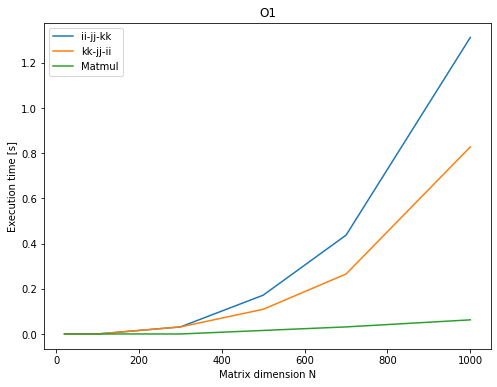

In [5]:
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

plt.xlabel('Matrix dimension N')
plt.ylabel('Execution time [s]')

ax.plot(Ns, timesO1[:,0], label='ii-jj-kk')
ax.plot(Ns, timesO1[:,1], label='kk-jj-ii')
ax.plot(Ns, timesO1[:,2], label='Matmul')

plt.title("O1")
plt.legend()
plt.show()

In [6]:
#test the algorithm with different optimization flags
#FLAG O2

subprocess.run(["gfortran", "Ex1_3.f90", "-o", "o2.out", "-O2"])

#vector containing execution times for each algorithm
timesO2 = np.zeros((len(Ns), 3))

for i, dim in enumerate(Ns):
    output = subprocess.run(['./o2.out'], stdout=subprocess.PIPE, input="{}\n{}\n{}\n{}\n".format(dim, dim, dim, dim),
                            encoding="ascii")

    lines = output.stdout.lstrip().split('\n')
    #print(lines)
    timesO2[i,0]=float(lines[-4]) #time ii-jj-kk
    timesO2[i,1]=float(lines[-2]) #time kk-jj-ii
    timesO2[i,2]=float(lines[-6]) #time instrinsic
    
    print('N = ', dim)
    print('Time taken: ', timesO2[i,:])


N =  20
Time taken:  [0. 0. 0.]
N =  100
Time taken:  [0. 0. 0.]
N =  300
Time taken:  [0.03125  0.015625 0.      ]
N =  500
Time taken:  [0.15625 0.0625  0.     ]
N =  700
Time taken:  [0.421875 0.15625  0.015625]
N =  1000
Time taken:  [1.25    0.59375 0.0625 ]


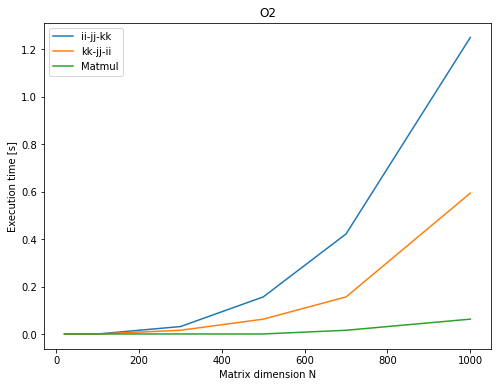

In [7]:
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

plt.xlabel('Matrix dimension N')
plt.ylabel('Execution time [s]')

ax.plot(Ns, timesO2[:,0], label='ii-jj-kk')
ax.plot(Ns, timesO2[:,1], label='kk-jj-ii')
ax.plot(Ns, timesO2[:,2], label='Matmul')

plt.title("O2")
plt.legend()
plt.show()

In [8]:
#test the algorithm with different optimization flags
#FLAG O3

subprocess.run(["gfortran", "Ex1_3.f90", "-o", "o3.out", "-O3"])

#vector containing execution times for each algorithm
timesO3 = np.zeros((len(Ns), 3))

for i, dim in enumerate(Ns):
    output = subprocess.run(['./o2.out'], stdout=subprocess.PIPE, input="{}\n{}\n{}\n{}\n".format(dim, dim, dim, dim),
                            encoding="ascii")

    lines = output.stdout.lstrip().split('\n')
    #print(lines)
    timesO3[i,0]=float(lines[-4]) #time ii-jj-kk
    timesO3[i,1]=float(lines[-2]) #time kk-jj-ii
    timesO3[i,2]=float(lines[-6]) #time instrinsic
    
    print('N = ', dim)
    print('Time taken: ', timesO3[i,:])


N =  20
Time taken:  [0. 0. 0.]
N =  100
Time taken:  [0. 0. 0.]
N =  300
Time taken:  [0.03125  0.015625 0.      ]
N =  500
Time taken:  [0.171875 0.109375 0.015625]
N =  700
Time taken:  [0.53125 0.1875  0.03125]
N =  1000
Time taken:  [1.5      0.640625 0.0625  ]


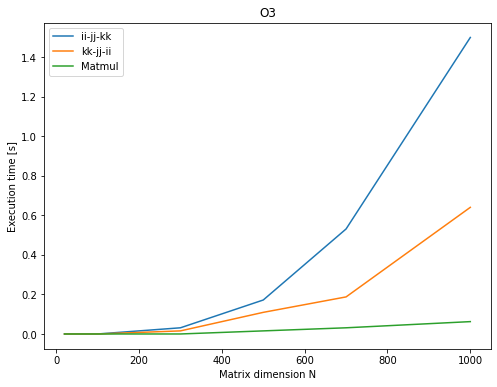

In [9]:
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

plt.xlabel('Matrix dimension N')
plt.ylabel('Execution time [s]')

ax.plot(Ns, timesO3[:,0], label='ii-jj-kk')
ax.plot(Ns, timesO3[:,1], label='kk-jj-ii')
ax.plot(Ns, timesO3[:,2], label='Matmul')

plt.title("O3")
plt.legend()
plt.show()

In [10]:
#test the algorithm with different optimization flags
#FLAG Ofast

subprocess.run(["gfortran", "Ex1_3.f90", "-o", "of.out", "-Ofast"])

#vector containing execution times for each algorithm
timesOf = np.zeros((len(Ns), 3))

for i, dim in enumerate(Ns):
    output = subprocess.run(['./o2.out'], stdout=subprocess.PIPE, input="{}\n{}\n{}\n{}\n".format(dim, dim, dim, dim),
                            encoding="ascii")

    lines = output.stdout.lstrip().split('\n')
    #print(lines)
    timesOf[i,0]=float(lines[-4]) #time ii-jj-kk
    timesOf[i,1]=float(lines[-2]) #time kk-jj-ii
    timesOf[i,2]=float(lines[-6]) #time instrinsic
    
    print('N = ', dim)
    print('Time taken: ', timesOf[i,:])


N =  20
Time taken:  [0. 0. 0.]
N =  100
Time taken:  [0. 0. 0.]
N =  300
Time taken:  [0.03125  0.015625 0.      ]
N =  500
Time taken:  [0.171875 0.15625  0.015625]
N =  700
Time taken:  [0.46875  0.171875 0.03125 ]
N =  1000
Time taken:  [1.4375   0.671875 0.046875]


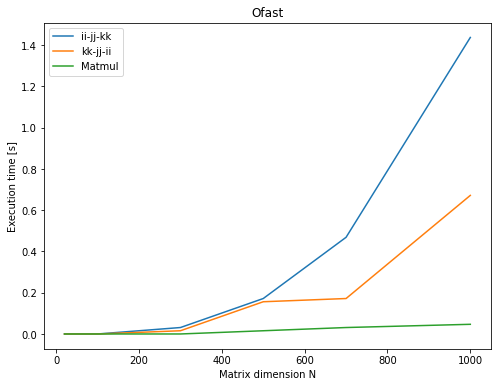

In [11]:
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

plt.xlabel('Matrix dimension N')
plt.ylabel('Execution time [s]')

ax.plot(Ns, timesOf[:,0], label='ii-jj-kk')
ax.plot(Ns, timesOf[:,1], label='kk-jj-ii')
ax.plot(Ns, timesOf[:,2], label='Matmul')

plt.title("Ofast")
plt.legend()
plt.show()